<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Введение-в-курс-дела" data-toc-modified-id="Введение-в-курс-дела-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Введение в курс дела</a></span></li><li><span><a href="#Приступление-к-проекту.-Открываем-файлы-и-изучаем-их." data-toc-modified-id="Приступление-к-проекту.-Открываем-файлы-и-изучаем-их.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приступление к проекту. Открываем файлы и изучаем их.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Введение в курс дела

**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

Химические элементы:
- ag - серебро
- pb - свинец
- sol - соль?
- au - золото

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

- **Описание данных**

    - _**Технологический процесс**_
        - Rougher feed — исходное сырье
        - Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
        - Xanthate **— ксантогенат (промотер, или активатор флотации);
        - Sulphate — сульфат (на данном производстве сульфид натрия);
        - Depressant — депрессант (силикат натрия).
        - Rougher process (англ. «грубый процесс») — флотация
        - Rougher tails — отвальные хвосты
        - Float banks — флотационная установка
        - Cleaner process — очистка
        - Rougher Au — черновой концентрат золота
        - Final Au — финальный концентрат золота
    - _**Параметры этапов**_
        - air amount — объём воздуха
        - fluid levels — уровень жидкости
        - feed size — размер гранул сырья
        - feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:

**[этап].[тип_параметра].[название_параметра]**

Пример: ``` rougher.input.feed_ag ```

- Возможные значения для блока [этап]:
    - rougher — флотация
    - primary_cleaner — первичная очистка
    - secondary_cleaner — вторичная очистка
    - final — финальные характеристики
    
    
- Возможные значения для блока [тип_параметра]:
    - input — параметры сырья
    - output — параметры продукта
    - state — параметры, характеризующие текущее состояние этапа
    - calculation — расчётные характеристики

**Расчёт эффективности**

Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды. 

Эффективность обогащения рассчитывается по формуле

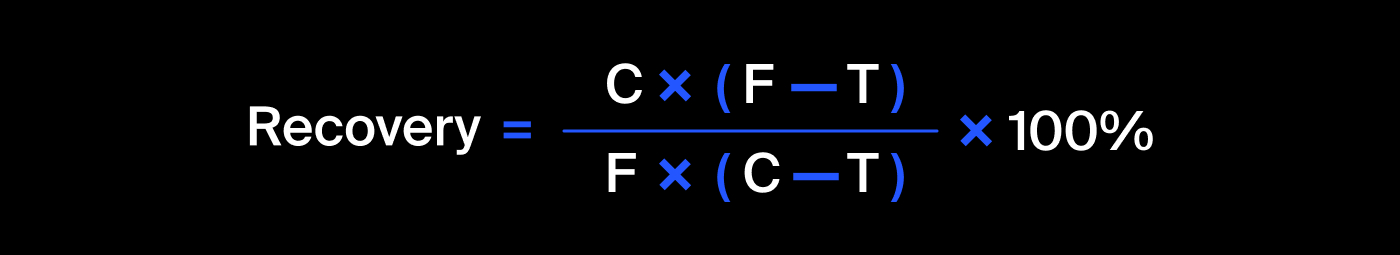

**RECOVERY = (C * (F - T)) / (F * (C - T)) * 100%**

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

**Метрика качества**

Для решения задачи введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:


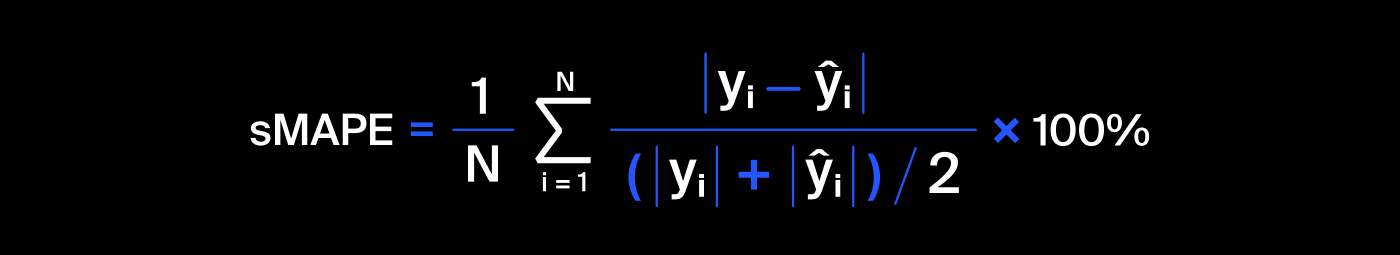

Обозначения:
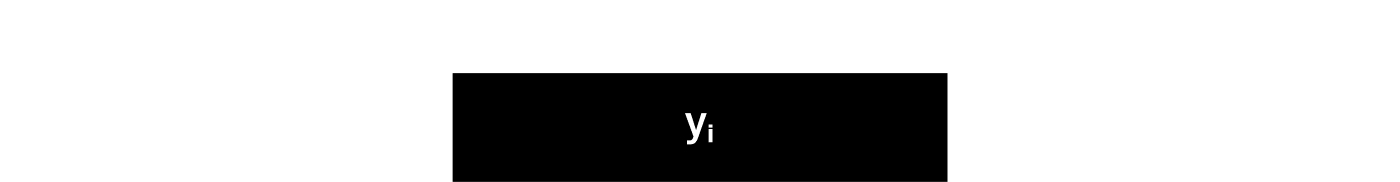
Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.

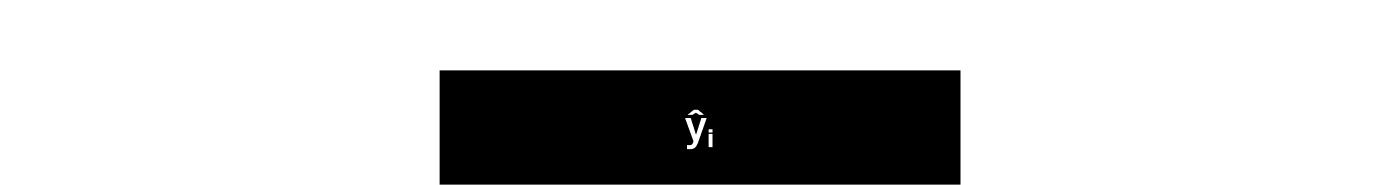
Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.

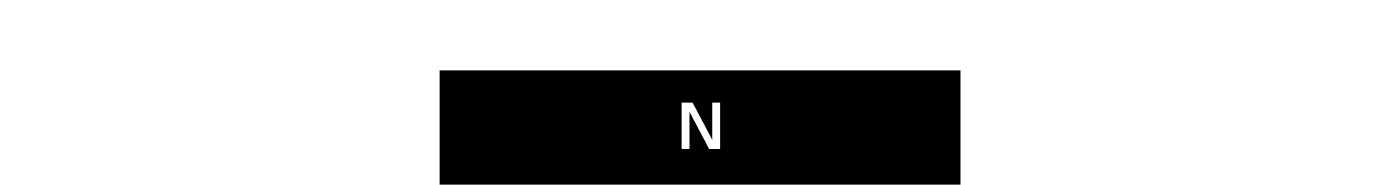
Количество объектов в выборке.

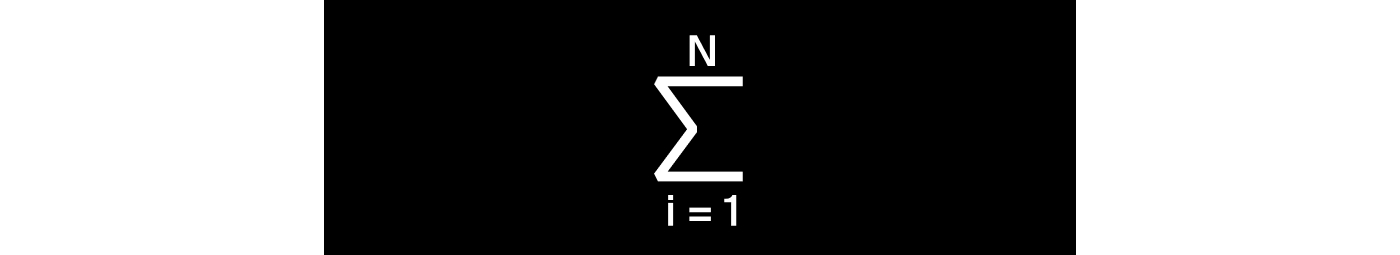
Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:
1. эффективность обогащения чернового концентрата ```rougher.output.recovery;```

2. эффективность обогащения финального концентрата ```final.output.recovery.```

Итоговая метрика складывается из двух величин:

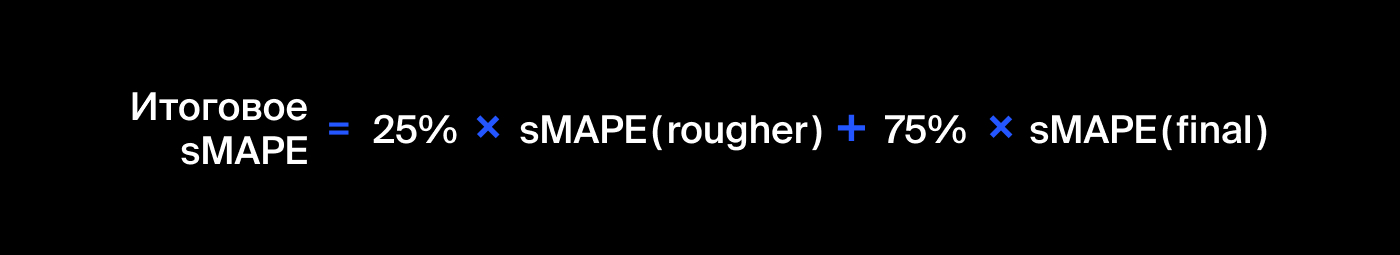

Данные находятся в трёх файлах:
- ```gold_recovery_train_new.csv``` — обучающая выборка;
- ```gold_recovery_test_new.csv``` — тестовая выборка;
- ```gold_recovery_full_new.csv``` — исходные данные.

Данные индексируются датой и временем получения информации (признак ```date```). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.

### Приступление к проекту. Открываем файлы и изучаем их.

In [2]:
# Подключаем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Разбиение на обучающую, валидационную и тестовую выборку
from sklearn.model_selection import train_test_split
# Применим кроссвалидацию для повышения качеств обучения
from sklearn.model_selection import cross_val_score

# Масштабируемость модели
from sklearn.preprocessing import StandardScaler

# и для машинного обучения разными способами (по условию мы выбираем линейную регрессию):
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import (
    # Точность модели
    accuracy_score,
    # Матрицы ошибок (для борьбы с дисбалансом)
    confusion_matrix, 
    # Полнота
    recall_score, 
    # Точность
    precision_score, 
    # F1-мера
    f1_score,
    # Метрика AUC-ROC
    roc_auc_score,
    roc_curve,
    # MSE
    mean_squared_error
)

# Контроль выборки
from sklearn.utils import shuffle

In [3]:
# Получаем датасеты
try:
    # Обучающая выборка
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    # Тестовая выборка
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    # Исходные данные
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    print('Отсутствует датасет. Проверьте путь файла')

***Примечание***

count    3.0 **количество наблюдений в наборе данных**

mean     2.0 **среднее арифметическое**

std      1.0 **стандартное отклонение**

min      1.0 **минимальное значение**

25%      1.5 **первый квартиль**

50%      2.0 **медиана, или второй квартиль**

75%      2.5 **третий квартиль**

max      3.0 **максимальное значение**

dtype: float64 **тип данных**

In [5]:
# Конечно же, можно применять библиотеку pandas_profiling, но юпитер раньше сдохнет, пока не 8 тыс. итераций не дойдет) 
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [6]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Стандартное отклонение (std) у него слишком высокое в маленьком кол-ве наблюдений по сравнению остальных 

In [7]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [53]:
# Проверим на наличие пропущенных значений
def check_missed_columns(dataset):
    name_columns = dataset.columns
    
    for i in name_columns:
        if(dataset[i].isna().sum() > 0):
            print(f'{i}: {dataset[i].isna().sum()}')

In [55]:
check_missed_columns(df_train)

final.output.concentrate_ag: 1
final.output.concentrate_pb: 1
final.output.concentrate_sol: 211
final.output.tail_pb: 100
final.output.tail_sol: 5
primary_cleaner.input.sulfate: 20
primary_cleaner.input.depressant: 32
primary_cleaner.input.xanthate: 100
primary_cleaner.output.concentrate_pb: 86
primary_cleaner.output.concentrate_sol: 286
primary_cleaner.output.tail_ag: 1
primary_cleaner.output.tail_pb: 15
primary_cleaner.output.tail_sol: 46
primary_cleaner.state.floatbank8_a_air: 4
primary_cleaner.state.floatbank8_a_level: 1
primary_cleaner.state.floatbank8_b_air: 4
primary_cleaner.state.floatbank8_b_level: 1
primary_cleaner.state.floatbank8_c_air: 2
primary_cleaner.state.floatbank8_c_level: 1
primary_cleaner.state.floatbank8_d_air: 3
primary_cleaner.state.floatbank8_d_level: 1
rougher.calculation.sulfate_to_au_concentrate: 1
rougher.calculation.floatbank10_sulfate_to_au_feed: 1
rougher.calculation.floatbank11_sulfate_to_au_feed: 1
rougher.input.feed_pb: 100
rougher.input.feed_rate: 8


In [56]:
check_missed_columns(df_test)

primary_cleaner.input.sulfate: 4
primary_cleaner.input.depressant: 5
primary_cleaner.input.xanthate: 4
rougher.input.feed_rate: 3
rougher.input.feed_size: 1
rougher.input.feed_sol: 21
rougher.input.floatbank10_sulfate: 5
rougher.input.floatbank11_sulfate: 8
rougher.input.floatbank11_xanthate: 25
secondary_cleaner.state.floatbank2_a_air: 3
secondary_cleaner.state.floatbank2_b_air: 2
secondary_cleaner.state.floatbank3_a_air: 9


In [57]:
check_missed_columns(df_full)

final.output.concentrate_ag: 1
final.output.concentrate_pb: 1
final.output.concentrate_sol: 211
final.output.tail_ag: 1
final.output.tail_pb: 101
final.output.tail_sol: 6
primary_cleaner.input.sulfate: 24
primary_cleaner.input.depressant: 37
primary_cleaner.input.xanthate: 104
primary_cleaner.output.concentrate_pb: 116
primary_cleaner.output.concentrate_sol: 370
primary_cleaner.output.tail_ag: 4
primary_cleaner.output.tail_pb: 21
primary_cleaner.output.tail_sol: 62
primary_cleaner.state.floatbank8_a_air: 4
primary_cleaner.state.floatbank8_a_level: 1
primary_cleaner.state.floatbank8_b_air: 4
primary_cleaner.state.floatbank8_b_level: 1
primary_cleaner.state.floatbank8_c_air: 2
primary_cleaner.state.floatbank8_c_level: 1
primary_cleaner.state.floatbank8_d_air: 3
primary_cleaner.state.floatbank8_d_level: 1
rougher.calculation.sulfate_to_au_concentrate: 2
rougher.calculation.floatbank10_sulfate_to_au_feed: 2
rougher.calculation.floatbank11_sulfate_to_au_feed: 2
rougher.input.feed_pb: 100
ro

Не так уж критично много пропущенных значений

In [68]:
# Посчитаем дубликаты
print('Кол-во дубликатов df_train:', df_train.duplicated().sum())

print('Кол-во дубликатов df_test:', df_test.duplicated().sum())

print('Кол-во дубликатов df_full:', df_full.duplicated().sum())

Кол-во дубликатов df_train: 0
Кол-во дубликатов df_test: 0
Кол-во дубликатов df_full: 0


## Анализ данных

## Модель

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке